<a href="https://colab.research.google.com/github/sapritanand/Ai-Stock-model/blob/main/AiStockModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [2]:
stock_data = yf.download('NVDA',start='2014-01-01',end='2024-07-07')
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,0.398000,0.399500,0.393000,0.396500,0.374024,260092000
2014-01-03,0.397250,0.398000,0.390500,0.391750,0.369543,259332000
2014-01-06,0.395750,0.400000,0.392000,0.397000,0.374496,409492000
2014-01-07,0.401000,0.405000,0.398250,0.403500,0.380627,333288000
2014-01-08,0.405000,0.411000,0.403500,0.409000,0.385815,308192000
...,...,...,...,...,...,...
2024-06-28,124.580002,127.709999,122.750000,123.540001,123.540001,315516700
2024-07-01,123.470001,124.839996,118.830002,124.300003,124.300003,284885500
2024-07-02,121.129997,123.410004,121.029999,122.669998,122.669998,218374000


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [4]:
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

In [5]:
import numpy as np

def create_dataset(data, time_step):

  x,y =[],[]
  for i in range(len(data) - time_step-1):
    x.append((data[i:(i + time_step) , 0]))
    y.append((data[i + time_step , 0]))

  return np.array(x),np.array(y)

In [6]:
time_step = 100

x,y = create_dataset(scaled_data, time_step)

In [7]:
train_size = 0.8

In [8]:
x_train, x_test = x[:int(x.shape[0]*train_size)], x[int(x.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]

In [9]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00


In [10]:
from tensorflow import keras
from keras.layers import Dense , LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(64,return_sequences = True,input_shape = (time_step,1)))
model.add(LSTM(64))
model.add(Dense(64))
model.add(Dense(1))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train, epochs=10,batch_size=64)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - loss: 0.0017
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - loss: 6.1842e-05
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 3.7554e-05
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 3.3905e-05
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 3.2626e-05
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 3.3761e-05
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 4.0010e-05
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 3.2198e-05
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - loss: 2.7405e-05
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 2.7851e-05


In [12]:
test_loss = model.evaluate(x_test,y_test)
test_loss

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7445e-04


0.0015587664674967527

In [13]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [14]:
original_data = stock_data["Close"].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)


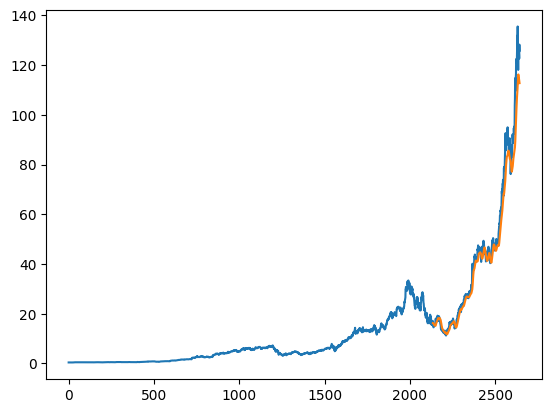

In [15]:
import matplotlib.pyplot as plt

plt.plot(original_data)
plt.plot(predicted_data)

In [16]:
new_predictions = model.predict(x_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)

predicted_data = np.append(predicted_data,new_predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


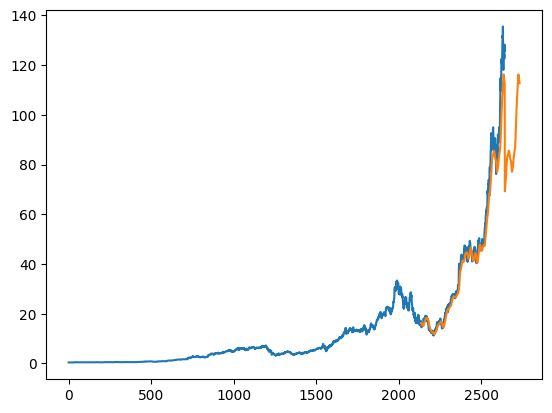

In [17]:
plt.plot(original_data)
plt.plot(predicted_data)